<a href="https://colab.research.google.com/github/mdsam7773/mohammad-sameer/blob/master/delivery_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
del_data = pd.read_csv('/content/drive/MyDrive/delivery.csv')
del_data.sample(5)
del_data.shape

(3181801, 19)

In [ ]:
 #compute summry statatics for numerical features
 del_data.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,ds,ETA_delivery_hours
count,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06,3.181801e+06
mean,2.257657e+06,6.547177e+01,2.367222e+03,1.167169e+02,3.096042e+01,2.974001e+04,4.244773e+00,1.167111e+02,3.094741e+01,1.167123e+02,3.095932e+01,8.101940e+02,3.266526e+00
std,1.303321e+06,5.050739e+01,1.387203e+03,6.589756e+00,2.267294e+00,1.728211e+04,5.473146e+00,6.624460e+00,2.252462e+00,6.628798e+00,2.275174e+00,1.666970e+02,1.293921e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.020849e+02,2.669903e+01,0.000000e+00,0.000000e+00,-9.000000e-05,-9.000000e-05,-9.000000e-05,-9.000000e-05,5.010000e+02,-7.023617e+03
25%,1.129127e+06,2.600000e+01,1.205000e+03,1.065996e+02,2.966916e+01,1.485600e+04,1.000000e+00,1.066213e+02,2.966298e+01,1.066004e+02,2.966938e+01,7.020000e+02,9.833333e-01
50%,2.257621e+06,4.900000e+01,2.275000e+03,1.202179e+02,3.029836e+01,2.970200e+04,1.000000e+00,1.202476e+02,3.029989e+01,1.202196e+02,3.029857e+01,8.190000e+02,1.850000e+00
75%,3.386639e+06,1.100000e+02,3.564000e+03,1.214083e+02,3.120316e+01,4.396400e+04,7.000000e+00,1.214000e+02,3.118910e+01,1.214081e+02,3.120300e+01,9.300000e+02,3.366667e+00
max,4.514660e+06,1.670000e+02,4.875000e+03,1.268191e+02,4.422335e+01,6.014800e+04,1.500000e+01,1.266288e+02,4.394521e+01,1.397561e+02,4.576194e+01,1.031000e+03,2.203817e+03


In [ ]:


del_data.isnull().sum()
del_data.dropna(inplace=True)


In [ ]:
del_data.duplicated().sum()

np.int64(0)

In [ ]:
del_data['aoi_type'].value_counts()

,count
aoi_type,
1.0,2137815
14.0,709517
0.0,90579
4.0,75839
2.0,48233
7.0,41270
9.0,19439
12.0,15918
3.0,11066


In [ ]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181801 entries, 0 to 3181800
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   order_id            int64  
 1   region_id           int64  
 2   city                object 
 3   courier_id          float64
 4   lng                 float64
 5   lat                 float64
 6   aoi_id              float64
 7   aoi_type            float64
 8   accept_time         object 
 9   accept_gps_time     object 
 10  accept_gps_lng      float64
 11  accept_gps_lat      float64
 12  delivery_time       object 
 13  delivery_gps_time   object 
 14  delivery_gps_lng    float64
 15  delivery_gps_lat    float64
 16  ds                  float64
 17  ETA_delivery        object 
 18  ETA_delivery_hours  float64
dtypes: float64(11), int64(2), object(6)
memory usage: 461.2+ MB


In [ ]:
timestamp_col = ['accept_time', 'accept_gps_time',
        'delivery_time', 'delivery_gps_time']



for column in timestamp_col:


  del_data[column] = pd.to_datetime(del_data[column],format = '%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181801 entries, 0 to 3181800
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   order_id            int64         
 1   region_id           int64         
 2   city                object        
 3   courier_id          float64       
 4   lng                 float64       
 5   lat                 float64       
 6   aoi_id              float64       
 7   aoi_type            float64       
 8   accept_time         datetime64[ns]
 9   accept_gps_time     datetime64[ns]
 10  accept_gps_lng      float64       
 11  accept_gps_lat      float64       
 12  delivery_time       datetime64[ns]
 13  delivery_gps_time   datetime64[ns]
 14  delivery_gps_lng    float64       
 15  delivery_gps_lat    float64       
 16  ds                  float64       
 17  ETA_delivery        object        
 18  ETA_delivery_hours  float64       
dtypes: datetime64[ns](4), float64(11), int64(2

In [ ]:
time_col = ['accept_time','delivery_time']
for col in time_col:

  del_data[col + 'hour'] = del_data[col].dt.hour
  del_data[col + 'day'] = del_data[col].dt.day
  del_data[col + 'weekday'] = del_data[col].dt.dayofweek
  del_data[col + 'is_weekend'] = del_data[col + 'weekday'].apply(lambda day: 1 if day >= 5 else 0 )


In [ ]:
del_data.sample(5)


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,ETA_delivery,ETA_delivery_hours,accept_timehour,accept_timeday,accept_timeweekday,accept_timeis_weekend,delivery_timehour,delivery_timeday,delivery_timeweekday,delivery_timeis_weekend
714877,4091055,153,Chongqing,997.0,106.55453,29.62705,13479.0,1.0,2023-10-22 14:30:00,2023-10-22 14:30:00,...,0 days 01:19:00,1.316667,14,22,6,1,15,22,6,1
1508528,4050227,36,Hangzhou,2307.0,120.22753,30.11947,46104.0,14.0,2023-10-22 08:37:00,2023-10-22 08:37:00,...,0 days 03:55:00,3.916667,8,22,6,1,12,22,6,1
123113,3594039,70,Chongqing,4292.0,106.53702,29.38164,49997.0,1.0,2023-09-08 14:56:00,2023-09-08 14:56:00,...,0 days 00:45:00,0.750000,14,8,4,0,15,8,4,0
2439113,2400395,29,Shanghai,3406.0,121.41255,31.23744,41059.0,1.0,2023-08-22 15:44:00,2023-08-22 15:44:00,...,0 days 00:54:00,0.900000,15,22,1,0,16,22,1,0
578831,1293018,141,Chongqing,454.0,106.59620,29.65161,28854.0,1.0,2023-09-25 13:53:00,2023-09-25 13:53:00,...,0 days 03:57:00,3.950000,13,25,0,0,17,25,0,0


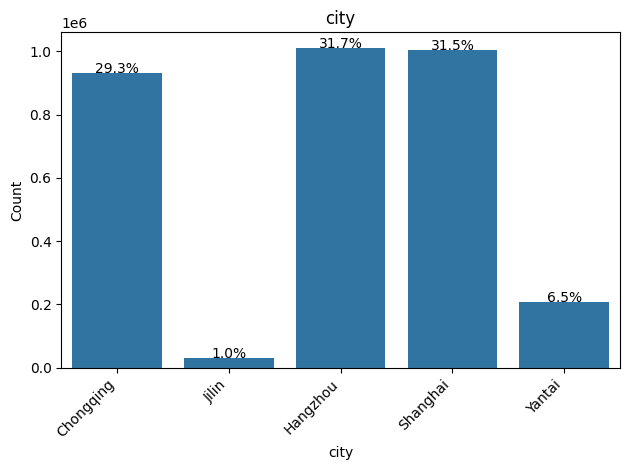

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total_orders = len(del_data)

# Create the countplot with normalized counts
ax = sns.countplot(x='city', data=del_data)

# Update y-axis labels to show proportions/percentages

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height / total_orders:.1%}', ha="center")


plt.title('city')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

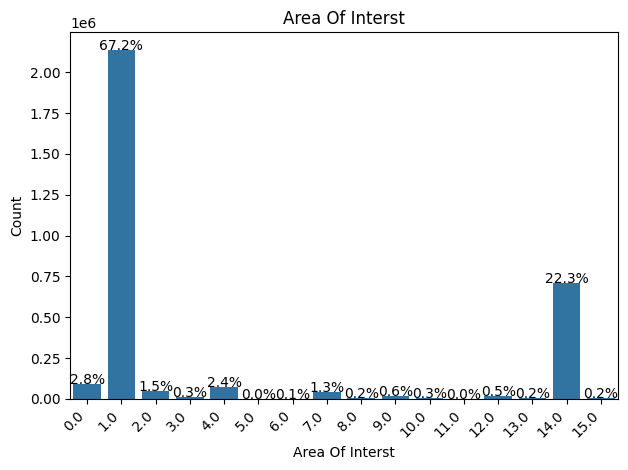

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total_orders = len(del_data)

# Create the countplot with normalized counts
ax = sns.countplot(x='aoi_type', data=del_data)

# Update y-axis labels to show proportions/percentages

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height / total_orders:.1%}', ha="center")


plt.title('Area Of Interst')
plt.xlabel('Area Of Interst')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='city'>

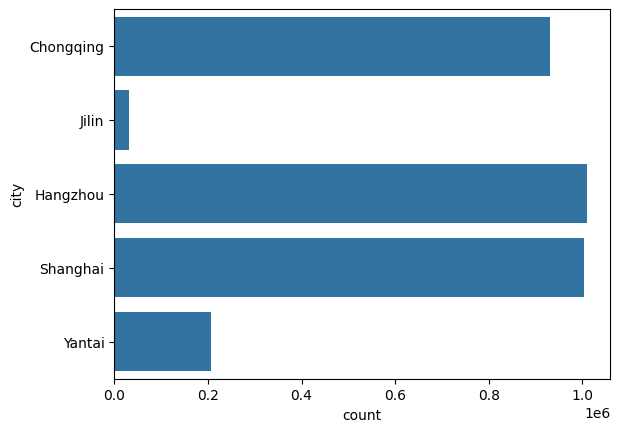

In [ ]:
sns.countplot(del_data['city'])

In [ ]:
del_data.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend'],
      dtype='object')

<Axes: ylabel='count'>

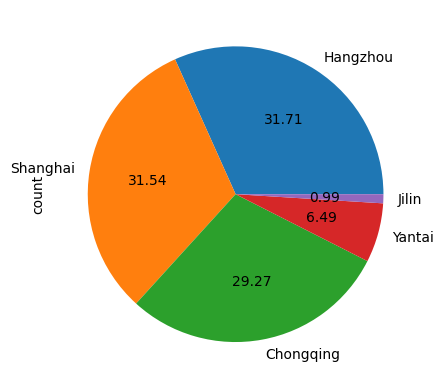

In [ ]:
del_data['city'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

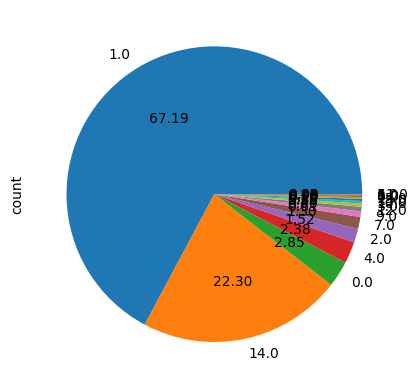

In [ ]:
del_data['aoi_type'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
'''numerical_features = del_data.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_features:
  plt.figure(figsize=(8,6))
  plt.hist(del_data[feature],bins=20)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()'''


"numerical_features = del_data.select_dtypes(include=['number']).columns.tolist()\nfor feature in numerical_features:\n  plt.figure(figsize=(8,6))\n  plt.hist(del_data[feature],bins=20)\n  plt.title(f'Distribution of {feature}')\n  plt.xlabel(feature)\n  plt.ylabel('Frequency')\n  plt.show()"

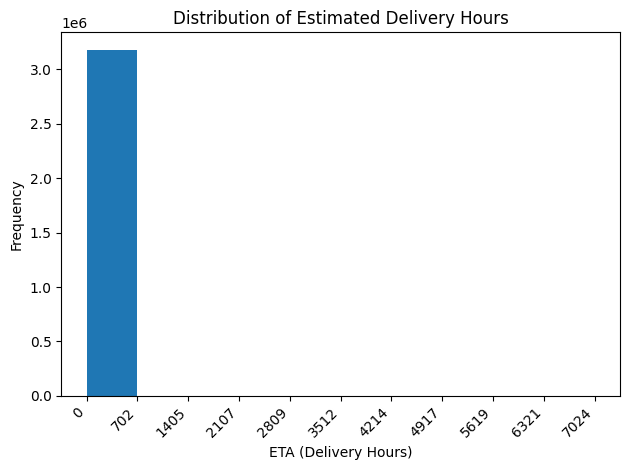

In [ ]:
#numerical_data
import numpy as np
del_data['ETA_delivery_hours'] = np.abs(del_data['ETA_delivery_hours'])
plt.hist(del_data['ETA_delivery_hours'])
bin_edges = np.histogram_bin_edges(del_data['ETA_delivery_hours'], bins=10)  # Get bin edges
plt.xticks(bin_edges, rotation=45, ha='right')  # Set ticks and labels

plt.title('Distribution of Estimated Delivery Hours')
plt.xlabel('ETA (Delivery Hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [ ]:
def haversine_distance(lat1,lon1,lat2,lon2):
  lat1,lon1,lat2,lon2 = map(np.radians,[lat1,lon1,lat2,lon2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
  c = 2 * np.arcsin(np.sqrt(a))
  r = 6371 #radius of earth in km
  return c * r

del_data['delivery_distance_km'] = del_data.apply(
    lambda row : haversine_distance(
        row['accept_gps_lat'],row['accept_gps_lng'],
        row['delivery_gps_lat'],row['delivery_gps_lng']
    ), axis = 1
)







In [ ]:
del_data[['order_id','delivery_distance_km']]

,order_id,delivery_distance_km
0,2031782,5.356405
1,4285071,5.971702
2,4056800,5.988467
3,3589481,5.845623
4,2752329,5.796263
...,...,...
3181796,2512759,2.070900
3181797,3779171,2.097186
3181798,4198558,2.406157
3181799,1805034,2.086519


Histogram



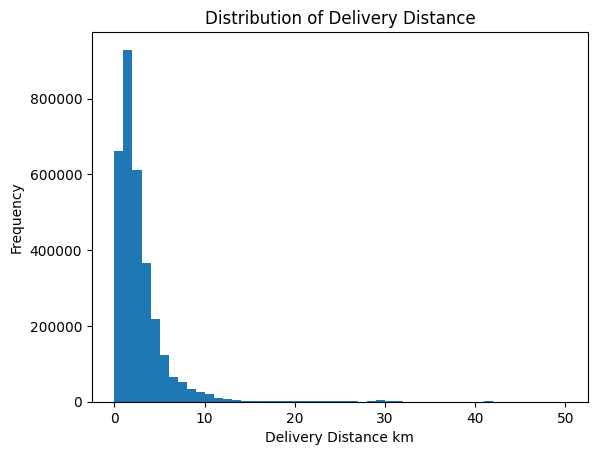

In [ ]:
plt.hist(del_data['delivery_distance_km'],range=(0,50),bins=50)
plt.xlabel('Delivery Distance km')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Distance')
plt.show()

In [ ]:
del_data.columns


Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend',
       'delivery_distance_km'],
      dtype='object')

Displot

In [ ]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181801 entries, 0 to 3181800
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   order_id                 int64         
 1   region_id                int64         
 2   city                     object        
 3   courier_id               float64       
 4   lng                      float64       
 5   lat                      float64       
 6   aoi_id                   float64       
 7   aoi_type                 float64       
 8   accept_time              datetime64[ns]
 9   accept_gps_time          datetime64[ns]
 10  accept_gps_lng           float64       
 11  accept_gps_lat           float64       
 12  delivery_time            datetime64[ns]
 13  delivery_gps_time        datetime64[ns]
 14  delivery_gps_lng         float64       
 15  delivery_gps_lat         float64       
 16  ds                       float64       
 17  ETA_delivery             ob

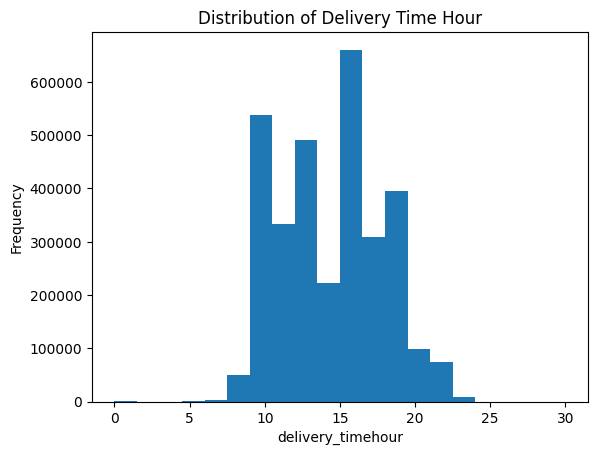

In [ ]:
plt.hist(del_data['delivery_timehour'],range=(0,30),bins=20)
plt.xlabel('delivery_timehour')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time Hour')
plt.show()

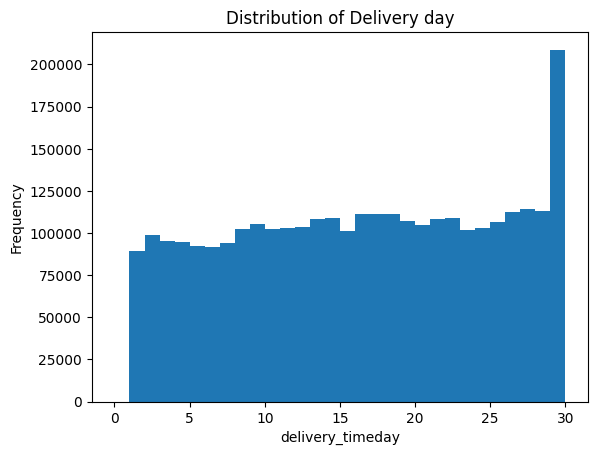

In [ ]:
plt.hist(del_data['delivery_timeday'],range=(0,30),bins=30)
plt.xlabel('delivery_timeday')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery day')
plt.show()

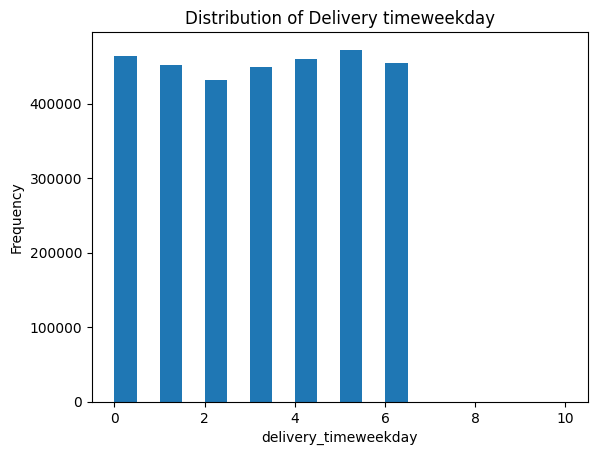

In [ ]:
plt.hist(del_data['delivery_timeweekday'],range=(0,10),bins=20)
plt.xlabel('delivery_timeweekday')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery timeweekday')
plt.show()

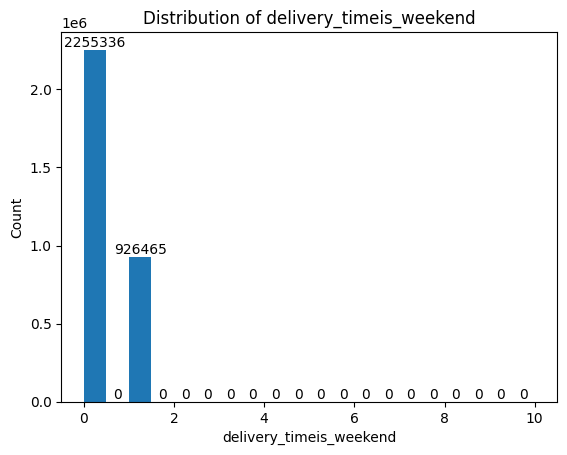

In [ ]:


plt.hist(del_data['delivery_timeis_weekend'],range=(0,10),bins=20)
plt.xlabel('delivery_timeis_weekend')
plt.ylabel('Count')
plt.title('Distribution of delivery_timeis_weekend')

#add count values above each bar
for rect in plt.gca().patches:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2,height + 0.1,
           int(height),ha = 'center',va = 'bottom')
plt.show()

In [ ]:
del_data.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend',
       'delivery_distance_km'],
      dtype='object')

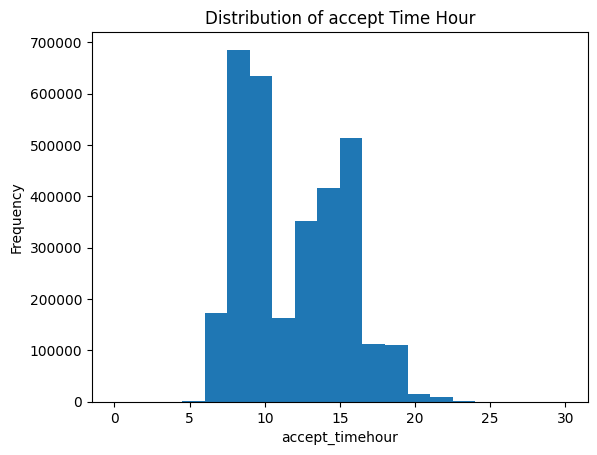

In [ ]:
plt.hist(del_data['accept_timehour'],range=(0,30),bins=20)
plt.xlabel('accept_timehour')
plt.ylabel('Frequency')
plt.title('Distribution of accept Time Hour')
plt.show()

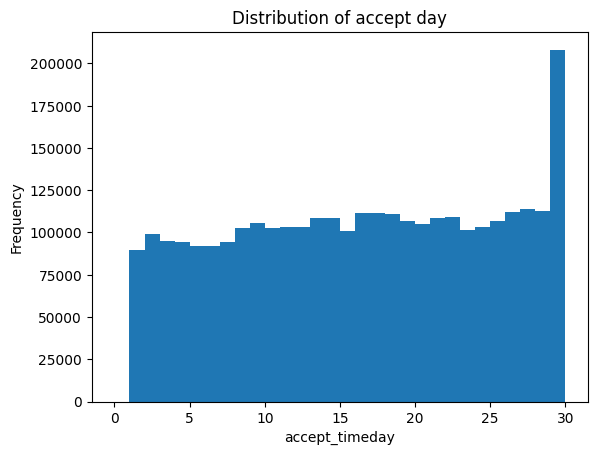

In [ ]:
plt.hist(del_data['accept_timeday'],range=(0,30),bins=30)
plt.xlabel('accept_timeday')
plt.ylabel('Frequency')
plt.title('Distribution of accept day')
plt.show()

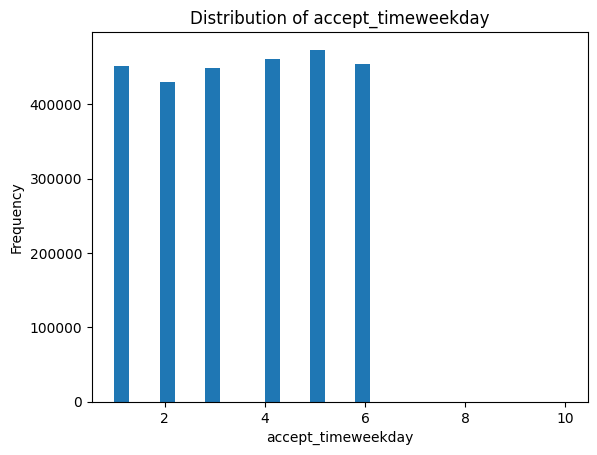

In [ ]:
#'accept_timeweekday', 'accept_timeis_weekend'
plt.hist(del_data['accept_timeweekday'],range=(1,10),bins=30)
plt.xlabel('accept_timeweekday')
plt.ylabel('Frequency')
plt.title('Distribution of accept_timeweekday')
plt.show()

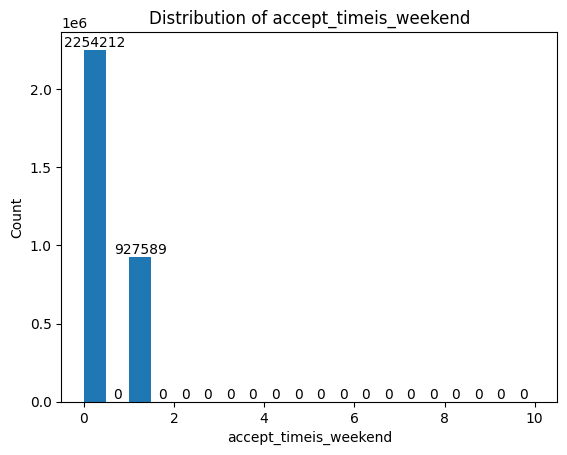

In [ ]:



plt.hist(del_data['accept_timeis_weekend'],range=(0,10),bins=20)
plt.xlabel('accept_timeis_weekend')
plt.ylabel('Count')
plt.title('Distribution of accept_timeis_weekend')

#add count values above each bar
for rect in plt.gca().patches:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2,height + 0.1,
           int(height),ha = 'center',va = 'bottom')
plt.show()

In [ ]:
del_data.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,ETA_delivery_hours,accept_timehour,accept_timeday,accept_timeweekday,accept_timeis_weekend,delivery_timehour,delivery_timeday,delivery_timeweekday,delivery_timeis_weekend,delivery_distance_km
1742702,1552436,56,Hangzhou,37.0,120.29177,30.39075,54577.0,14.0,2023-06-29 08:01:00,2023-06-29 08:01:00,...,1.116667,8,29,3,0,9,29,3,0,3.074334
604386,3939060,142,Chongqing,4346.0,106.54780,29.83531,27852.0,14.0,2023-10-13 07:57:00,2023-10-13 07:57:00,...,6.216667,7,13,4,0,14,13,4,0,14.353229
2545453,3080884,38,Shanghai,918.0,121.86388,30.97887,55276.0,1.0,2023-08-16 16:16:00,2023-08-16 16:16:00,...,1.216667,16,16,2,0,17,16,2,0,5.472490
1505229,1063144,36,Hangzhou,4748.0,120.27711,30.11161,41335.0,1.0,2023-09-22 08:27:00,2023-09-22 08:27:00,...,2.300000,8,22,4,0,10,22,4,0,6.594117
962313,592867,165,Jilin,1656.0,126.57196,43.92293,58403.0,1.0,2023-07-15 09:19:00,2023-07-15 09:19:00,...,2.683333,9,15,5,1,12,15,5,1,3.306533


In [ ]:
del_data.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend',
       'delivery_distance_km'],
      dtype='object')

<Axes: >

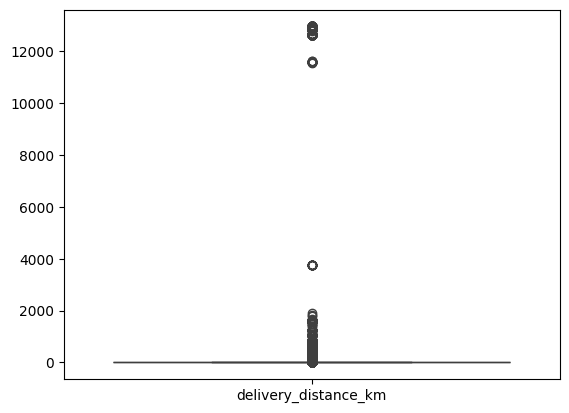

In [ ]:
sns.boxplot([del_data['delivery_distance_km']])

<Axes: >

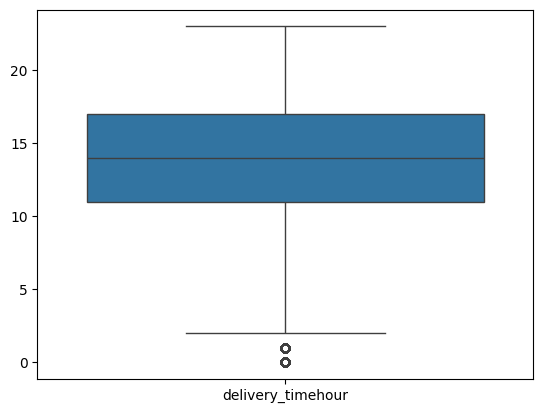

In [ ]:
sns.boxplot([del_data['delivery_timehour']])


<Axes: >

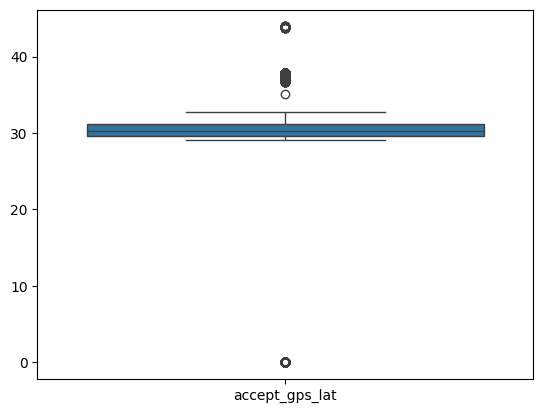

In [ ]:
sns.boxplot([del_data['accept_gps_lat']])

<Axes: >

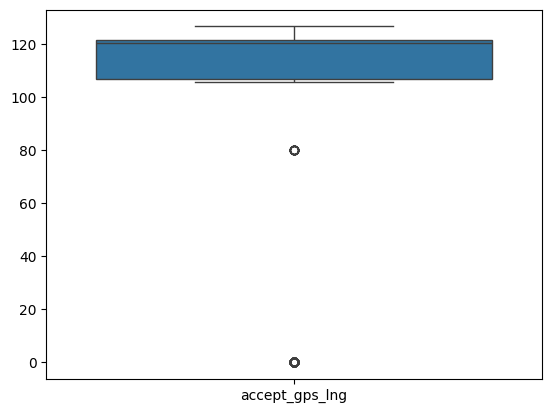

In [ ]:
sns.boxplot([del_data['accept_gps_lng']])

<Axes: >

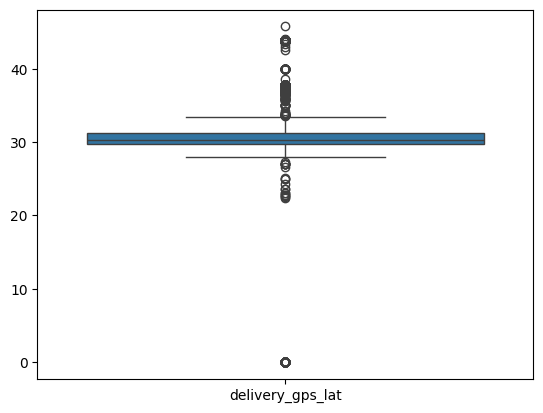

In [ ]:
sns.boxplot([del_data['delivery_gps_lat']])

<Axes: >

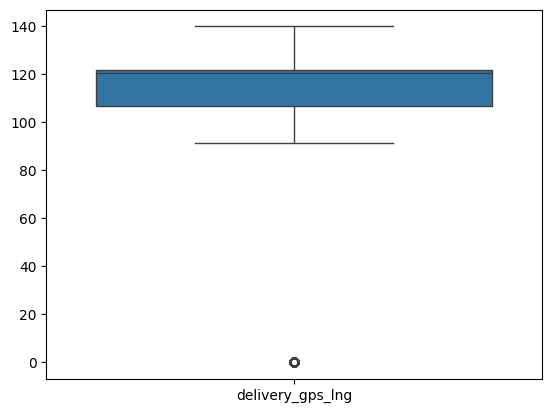

In [ ]:
sns.boxplot([del_data['delivery_gps_lng']])

<Axes: >

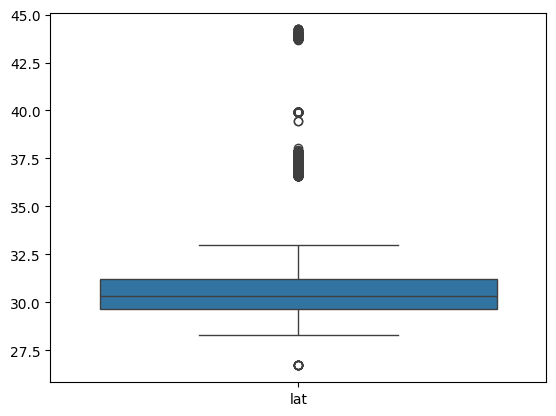

In [ ]:
sns.boxplot([del_data['lat']])

<Axes: >

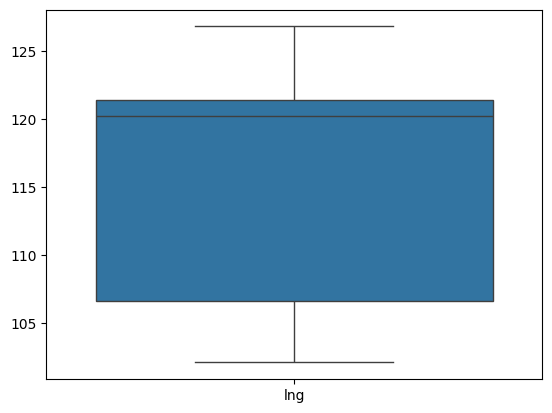

In [ ]:
sns.boxplot([del_data['lng']])

<Axes: >

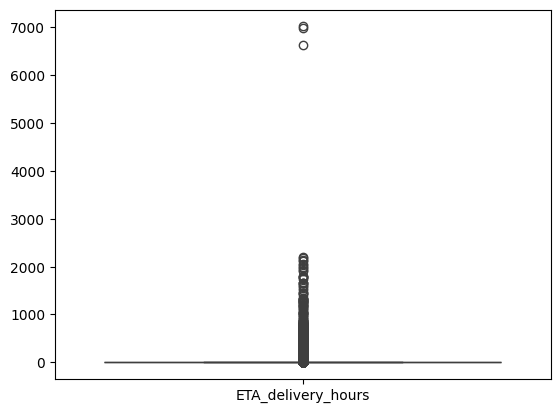

In [ ]:
sns.boxplot([del_data['ETA_delivery_hours']])

In [ ]:
del_data.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend',
       'delivery_distance_km'],
      dtype='object')

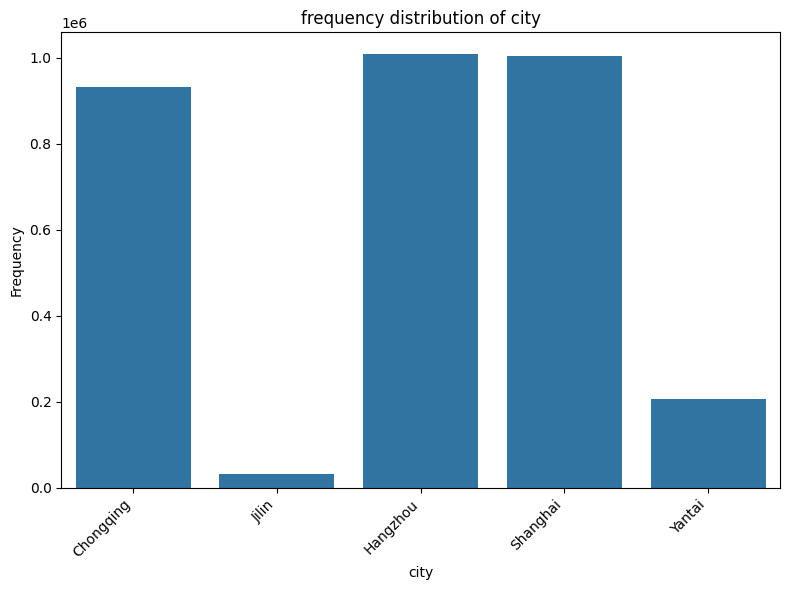

In [ ]:
#frequency Distribution of City Using bar plots
plt.figure(figsize=(8,6))
sns.countplot(x="city",data=del_data)
plt.title('frequency distribution of city')
plt.xlabel('city')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#bivariative Analysis

In [ ]:
numerical_features = del_data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
feature_pairs = [
    ('delivery_distance_km', 'ETA_delivery_hours'),
    ('accept_gps_lat', 'delivery_gps_lat'),
    ('accept_gps_lng', 'delivery_gps_lng'),
    # Add more pairs as needed
]


In [ ]:
del_data.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'ETA_delivery',
       'ETA_delivery_hours', 'accept_timehour', 'accept_timeday',
       'accept_timeweekday', 'accept_timeis_weekend', 'delivery_timehour',
       'delivery_timeday', 'delivery_timeweekday', 'delivery_timeis_weekend',
       'delivery_distance_km'],
      dtype='object')

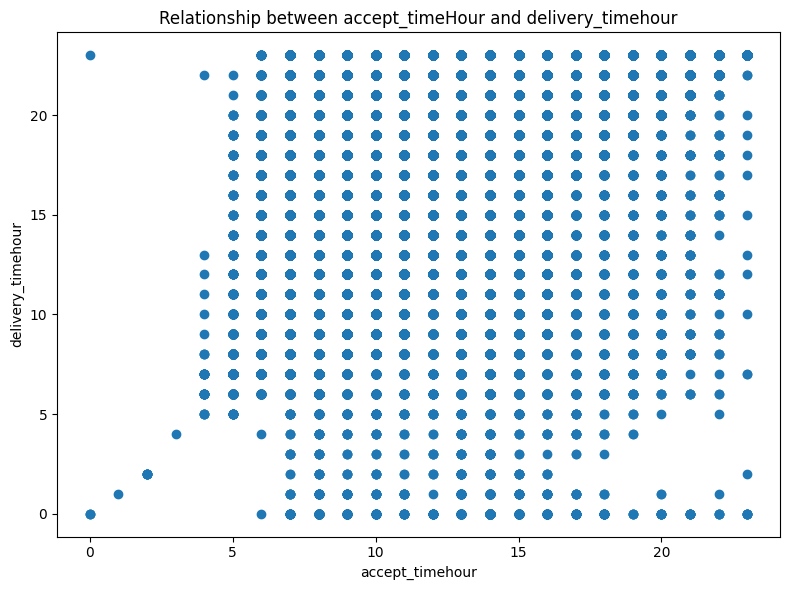

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(del_data['accept_timehour'], del_data['delivery_timehour'])
plt.title('Relationship between accept_timeHour and delivery_timehour')
plt.xlabel('accept_timehour')
plt.ylabel('delivery_timehour')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(del_data['order_id'], del_data['accept_timeday'])
plt.title('Relationship between accept_timeHour and delivery_timehour')
plt.xlabel('accept_timehour')
plt.ylabel('delivery_timehour')
plt.tight_layout()
plt.show()

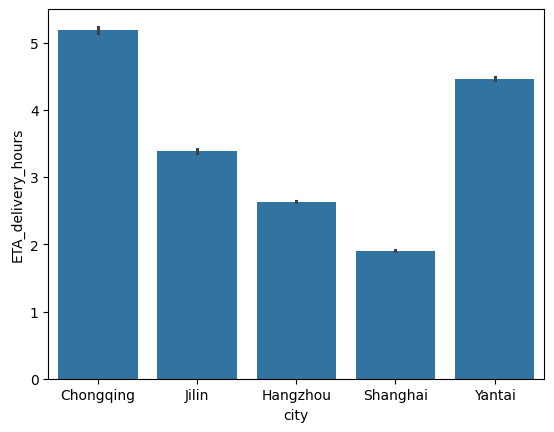

In [ ]:
ax= sns.barplot(x='city',y = 'ETA_delivery_hours',data=del_data)

plt.show()

<Axes: xlabel='city', ylabel='delivery_distance_km'>

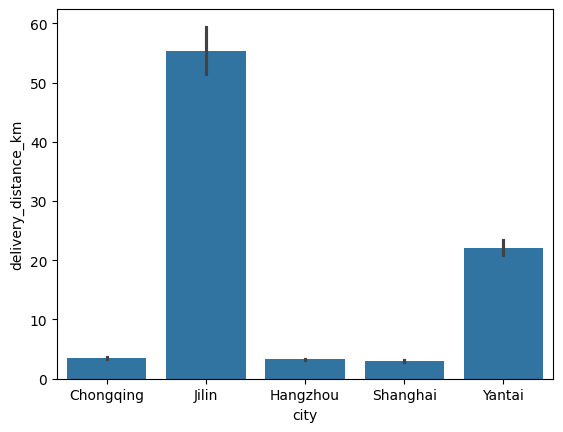

In [ ]:

sns.barplot(x='city',y = 'delivery_distance_km',data=del_data)


In [ ]:
'''To quantify the linear relationship between pairs of numerical features,
 you can compute Pearson's correlation coefficient or Spearman's rank correlation
  coefficient. Pearson's coefficient measures the strength of a linear relationship,
  while Spearman's assesses the strength of a monotonic (non-linear) relationship. Both
   coefficients range from -1 to +1, with values closer to 1 indicating a strong positive
    relationship, values closer to -1 indicating a strong negative relationship, and values
    near 0 indicating a weak or no relationship. '''


pearson_corr = del_data[numerical_features].corr(method='pearson')
print(pearson_corr)

                         order_id  region_id  courier_id       lng       lat  \
order_id                 1.000000   0.000480   -0.000604 -0.000506 -0.000158   
region_id                0.000480   1.000000    0.039866 -0.681554  0.086623   
courier_id              -0.000604   0.039866    1.000000 -0.027531 -0.038406   
lng                     -0.000506  -0.681554   -0.027531  1.000000  0.449903   
lat                     -0.000158   0.086623   -0.038406  0.449903  1.000000   
aoi_id                   0.000012   0.014450   -0.001300 -0.012011 -0.000645   
aoi_type                 0.000056   0.035793    0.011904  0.008706  0.062141   
accept_gps_lng          -0.000527  -0.679215   -0.027437  0.993768  0.443578   
accept_gps_lat          -0.000074   0.079166   -0.038819  0.448605  0.985335   
delivery_gps_lng        -0.000506  -0.677457   -0.027526  0.993936  0.447148   
delivery_gps_lat        -0.000160   0.086212   -0.038402  0.448330  0.996249   
ds                       0.000141  -0.04

In [ ]:
spearman_corr = del_data[numerical_features].corr(method='pearson')
print(spearman_corr)

                         order_id  region_id  courier_id       lng       lat  \
order_id                 1.000000   0.000480   -0.000604 -0.000506 -0.000158   
region_id                0.000480   1.000000    0.039866 -0.681554  0.086623   
courier_id              -0.000604   0.039866    1.000000 -0.027531 -0.038406   
lng                     -0.000506  -0.681554   -0.027531  1.000000  0.449903   
lat                     -0.000158   0.086623   -0.038406  0.449903  1.000000   
aoi_id                   0.000012   0.014450   -0.001300 -0.012011 -0.000645   
aoi_type                 0.000056   0.035793    0.011904  0.008706  0.062141   
accept_gps_lng          -0.000527  -0.679215   -0.027437  0.993768  0.443578   
accept_gps_lat          -0.000074   0.079166   -0.038819  0.448605  0.985335   
delivery_gps_lng        -0.000506  -0.677457   -0.027526  0.993936  0.447148   
delivery_gps_lat        -0.000160   0.086212   -0.038402  0.448330  0.996249   
ds                       0.000141  -0.04

<Axes: xlabel='city', ylabel='ETA_delivery_hours'>

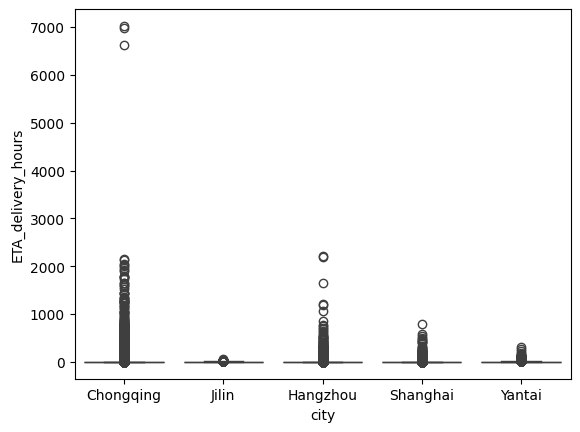

In [ ]:
sns.boxplot(x='city',y='ETA_delivery_hours',data=del_data)

<Axes: xlabel='city', ylabel='delivery_distance_km'>

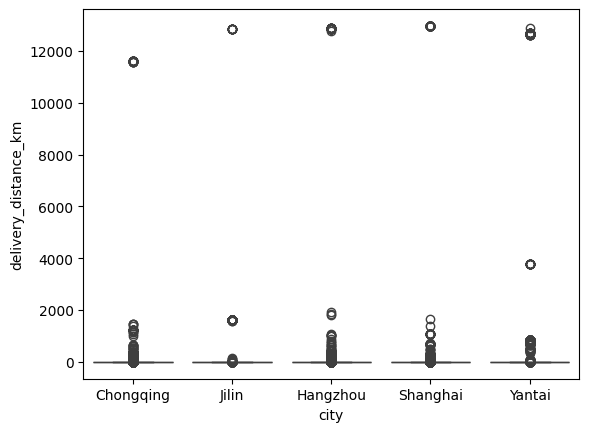

In [ ]:
sns.boxplot(x='city',y='delivery_distance_km',data=del_data)

<Axes: xlabel='city', ylabel='delivery_timehour'>

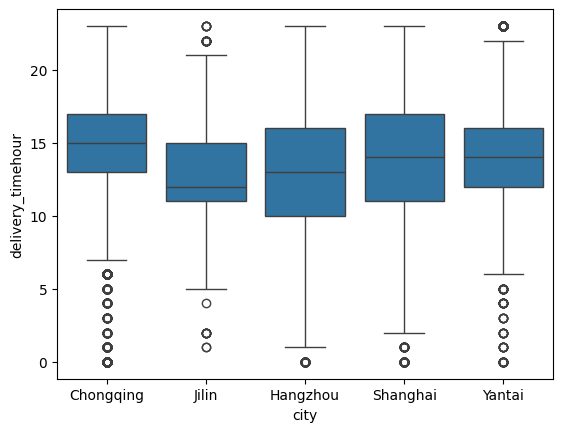

In [ ]:
sns.boxplot(x='city',y='delivery_timehour',data=del_data)

<Axes: xlabel='aoi_type', ylabel='delivery_timehour'>

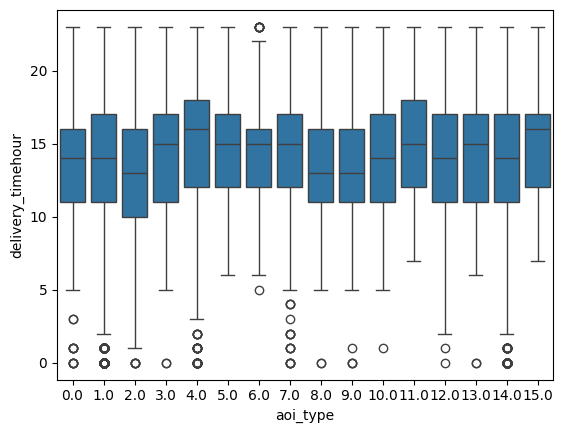

In [ ]:
sns.boxplot(x='aoi_type',y='delivery_timehour',data=del_data)

<Axes: xlabel='aoi_type', ylabel='ETA_delivery_hours'>

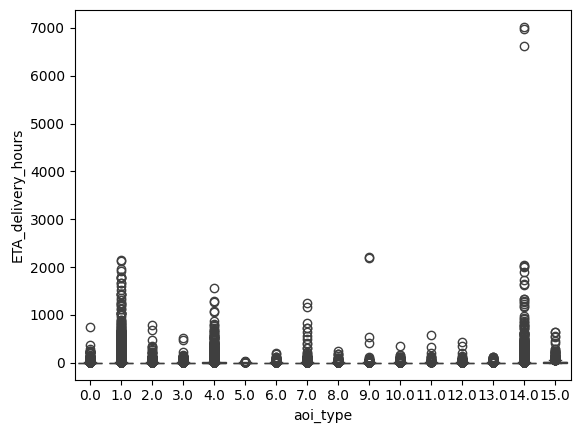

In [ ]:
sns.boxplot(x='aoi_type',y='ETA_delivery_hours',data=del_data)

In [ ]:
#multivariative data analysis
num = ['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds',
       'ETA_delivery_hours',
       'delivery_distance_km']

corr_metrix = del_data[num].corr()
corr_metrix


,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,ETA_delivery_hours,delivery_distance_km
order_id,1.000000,0.000480,-0.000604,-0.000506,-0.000158,0.000012,0.000056,0.000124,-0.000527,-0.000074,0.000123,-0.000506,-0.000160,0.000141,0.000995,-0.000036
region_id,0.000480,1.000000,0.039866,-0.681554,0.086623,0.014450,0.035793,-0.046673,-0.679215,0.079166,-0.045856,-0.677457,0.086212,-0.049195,0.080249,0.022013
courier_id,-0.000604,0.039866,1.000000,-0.027531,-0.038406,-0.001300,0.011904,-0.007931,-0.027437,-0.038819,-0.007961,-0.027526,-0.038402,-0.008185,-0.002831,0.002635
lng,-0.000506,-0.681554,-0.027531,1.000000,0.449903,-0.012011,0.008706,0.016268,0.993768,0.448605,0.015299,0.993936,0.448330,0.019587,-0.094907,0.011690
lat,-0.000158,0.086623,-0.038406,0.449903,1.000000,-0.000645,0.062141,-0.035374,0.443578,0.985335,-0.035417,0.447148,0.996249,-0.034780,-0.004588,0.055980
aoi_id,0.000012,0.014450,-0.001300,-0.012011,-0.000645,1.000000,0.016526,0.006951,-0.012195,-0.001353,0.006957,-0.011972,-0.000616,0.006827,0.001539,0.002854
aoi_type,0.000056,0.035793,0.011904,0.008706,0.062141,0.016526,1.000000,-0.011116,0.008175,0.058780,-0.010773,0.008659,0.061903,-0.011497,0.034849,0.017021
accept_gps_time,0.000124,-0.046673,-0.007931,0.016268,-0.035374,0.006951,-0.011116,1.000000,0.017336,-0.031760,0.999946,0.016018,-0.035361,0.993275,-0.005819,-0.012389
accept_gps_lng,-0.000527,-0.679215,-0.027437,0.993768,0.443578,-0.012195,0.008175,0.017336,1.000000,0.455255,0.016372,0.987786,0.442099,0.020639,-0.094493,-0.065496
accept_gps_lat,-0.000074,0.079166,-0.038819,0.448605,0.985335,-0.001353,0.058780,-0.031760,0.455255,1.000000,-0.031813,0.445949,0.981853,-0.031154,-0.005515,-0.053568


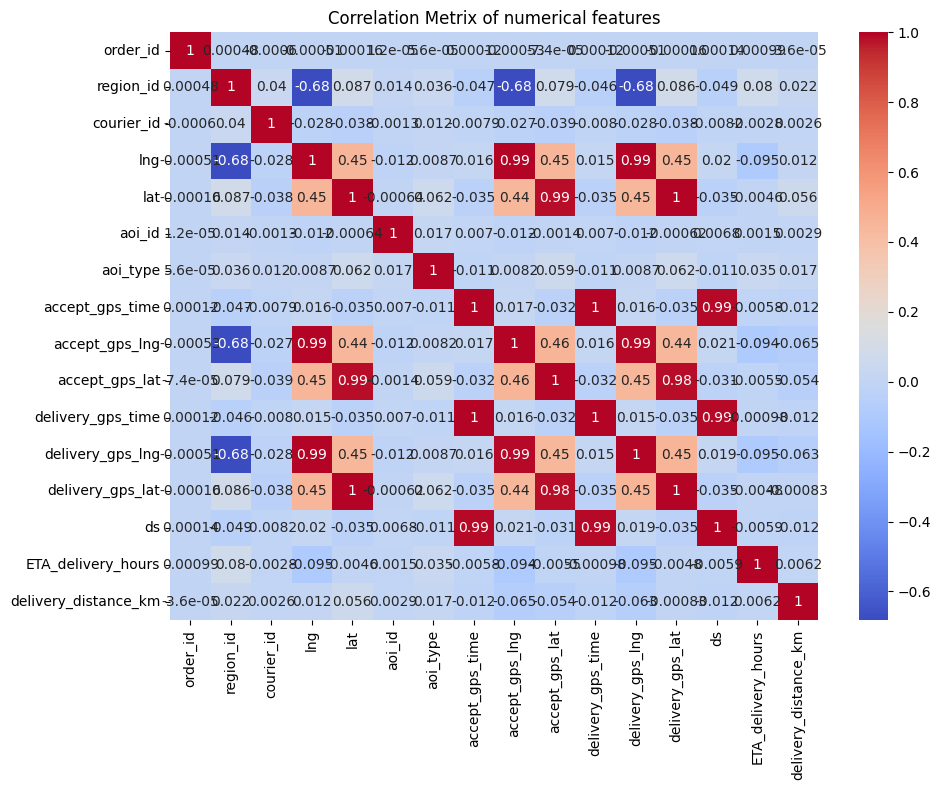

In [ ]:
#heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_metrix,annot=True,cmap='coolwarm')
plt.title('Correlation Metrix of numerical features')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
imp_feature = ['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_gps_lng',
       'accept_gps_lat',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds',
       'ETA_delivery_hours',
       'delivery_distance_km']

#standrize the data before applying pca
scaler = StandardScaler()
x = del_data[imp_feature]
x_scaled = scaler.fit_transform(x)

#Create a PCA object and fit it to the scaled data:
pca = PCA()
pca.fit(x_scaled)

#Examine the explained variance ratio to determine the number of important components:

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


[3.21624989e-01 1.60606599e-01 7.37801240e-02 7.23472778e-02
 7.15739705e-02 7.14351320e-02 7.12001030e-02 7.01980872e-02
 6.78277572e-02 1.72097083e-02 1.86626693e-03 3.08063127e-04
 1.85794588e-05 3.34201988e-06]


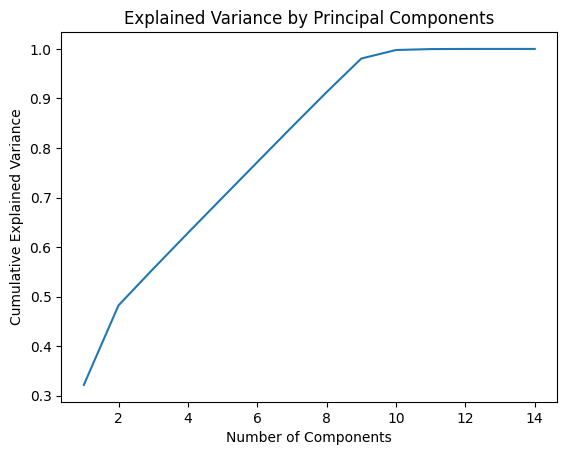

In [ ]:
# cumulative explained variance to visualize the contribution of each component:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

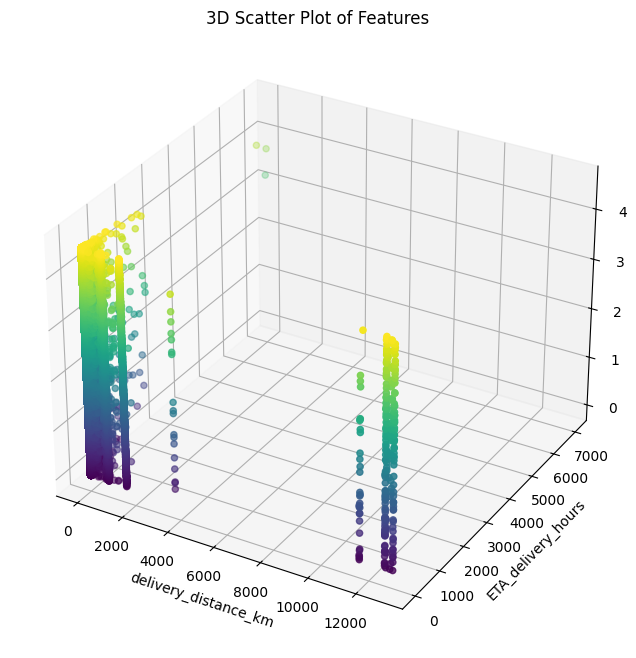

In [ ]:
# - Explore interactions between multiple features using 3D plots or parallel coordinates plots.
feature1 = 'delivery_distance_km'
feature2 = 'ETA_delivery_hours'
feature3 = 'order_id'

fig = plt.figure(figsize=(10, 8))  # Adjust figure size as needed
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(del_data[feature1], del_data[feature2], del_data[feature3], c=del_data[feature3], cmap='viridis')  # Color by feature3

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Features')

plt.show()